<a href="https://colab.research.google.com/github/Ynsuk/intermidiate/blob/main/3_4_DNN_lab_ipynb_YNSK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Deep Neural Network</h1>

# import

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model

# Vanishing Gradient


## XOR 문제, Deep Model

In [ ]:
tf.random.set_seed(777)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([0, 1, 1, 0], dtype=np.float32)

model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(2,)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.summary()
model.compile(optimizer='adam', loss='mse', metrics='accuracy')
model.fit(X,y, epochs=5000, verbose=0)
model.evaluate(X,y)
model.predict(X)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                1

array([[0.33336225],
       [0.99219644],
       [0.33336058],
       [0.33336383]], dtype=float32)

## 활성화 함수를 변경 : 'relu'

In [ ]:
tf.random.set_seed(777)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([0, 1, 1, 0], dtype=np.float32)

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(2,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()
model.compile(optimizer='adam', loss='mse', metrics='accuracy')
model.fit(X,y, epochs=5000, verbose=0)
model.evaluate(X,y)
model.predict(X)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                30        
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 10)               

array([[1.1162285e-03],
       [9.9963999e-01],
       [9.9921095e-01],
       [4.9661088e-05]], dtype=float32)

In [ ]:
tf.random.set_seed(777)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([0, 1, 1, 0], dtype=np.float32)

model = Sequential()
model.add(Dense(10, input_shape=(2,)))
model.add(Dense(10))
model.add(Dense(10))
model.add(Dense(10))
model.add(Dense(10))
model.add(Dense(10))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()
model.compile(optimizer='adam', loss='mse', metrics='accuracy')
model.fit(X,y, epochs=5000, verbose=0)
model.evaluate(X,y)
model.predict(X)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 10)                30        
                                                                 
 dense_45 (Dense)            (None, 10)                110       
                                                                 
 dense_46 (Dense)            (None, 10)                110       
                                                                 
 dense_47 (Dense)            (None, 10)                110       
                                                                 
 dense_48 (Dense)            (None, 10)                110       
                                                                 
 dense_49 (Dense)            (None, 10)                110       
                                                                 
 dense_50 (Dense)            (None, 10)               

1/1 [==============================] - 0s 78ms/step


array([[3.6027752e-05],
       [9.9919814e-01],
       [9.9918693e-01],
       [5.7785184e-04]], dtype=float32)

# 회귀 문제


## 보스턴 주택 가격 회귀 실습 데이터
* http://lib.stat.cmu.edu/datasets/boston
* `keras.datasets.boston_housing.load_data()`

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

df = pd.DataFrame(X_train)
df['target'] = y_train
df

# data를 표준화 혹은 정규화 해야한다.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(scaler.mean_, scaler.var_)
df = pd.DataFrame(X_train_scaled)
display(df)

#validation은 학습하는 중간에 평가하는거, test set은 미래의 데이터?
X_val, X_test, y_val, y_test = train_test_split(X_test_scaled, y_test, test_size=0.5, random_state=0)
print(X_val.shape, X_test.shape, y_val.shape, y_test.shape)


(404, 13) (404,) (102, 13) (102,)
[3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01] [8.51798073e+01 5.63505796e+02 4.62790747e+01 5.80519067e-02
 1.37236180e-02 5.02551441e-01 7.78748377e+02 4.11156931e+00
 7.54741937e+01 2.76119724e+04 4.82969580e+00 8.83498510e+03
 5.24981521e+01]


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.272246,-0.483615,-0.435762,-0.256833,-0.165227,-0.176443,0.813062,0.116698,-0.626249,-0.595170,1.148500,0.448077,0.825220
1,-0.403427,2.991784,-1.333912,-0.256833,-1.215182,1.894346,-1.910361,1.247585,-0.856463,-0.348433,-1.718189,0.431906,-1.329202
2,0.124940,-0.483615,1.028326,-0.256833,0.628642,-1.829688,1.110488,-1.187439,1.675886,1.565287,0.784476,0.220617,-1.308500
3,-0.401494,-0.483615,-0.869402,-0.256833,-0.361560,-0.324558,-1.236672,1.107180,-0.511142,-1.094663,0.784476,0.448077,-0.652926
4,-0.005634,-0.483615,1.028326,-0.256833,1.328612,0.153642,0.694808,-0.578572,1.675886,1.565287,0.784476,0.389882,0.263497
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.381973,-0.483615,-0.616568,-0.256833,-0.933487,-0.938177,-0.251223,1.157680,-0.741356,-1.040501,-0.262093,0.448077,0.477421
400,-0.388221,0.358906,-0.609218,-0.256833,-0.796907,-0.038202,-1.888860,0.339660,-0.741356,-1.100681,0.056428,0.448077,-0.848908
401,-0.402030,0.990797,-0.741515,-0.256833,-1.019702,-0.333021,-1.638018,1.430403,-0.971569,-0.613224,-0.717123,0.079439,-0.677769
402,-0.172920,-0.483615,1.245881,-0.256833,2.677335,-0.787241,1.056737,-1.044075,-0.511142,-0.017443,-1.718189,-0.987644,0.420835


(51, 13) (51, 13) (51,) (51,)


In [ ]:
def r2(y_true, y_pred):
    r2_score=1-tf.reduce_sum((y_true-y_pred)**2)/tf.reduce_sum((y_true-tf.reduce_mean(y_true))**2)
    return r2_score
  


In [ ]:
tf.random.set_seed(0)
np.random.seed(0)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse',metrics=['mae', r2])
model.summary()

history = model.fit(X_train_scaled, y_train, epochs=200, validation_data=(X_val, y_val), batch_size=100)
model.evaluate(X_train_scaled, y_train)
model.evaluate(X_test, y_test)



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 64)                896       
                                                                 
 dense_34 (Dense)            (None, 64)                4160      
                                                                 
 dense_35 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
5/5 [==============================] - 2s 53ms/step - loss: 594.9488 - mae: 22.5420 - r2: -5.9666 - val_loss: 608.4158 - val_mae: 22.7195 - val_r2: -5.7146
Epoch 2/200
5/5 [==============================] - 0s 15ms/step - loss: 573.5807 - mae: 22.0454 - r2: -5.9322 - val_loss: 587.6052 - val_mae: 22.223

[18.55198097229004, 3.252309799194336, 0.7331331968307495]

dict_keys(['loss', 'mae', 'r2', 'val_loss', 'val_mae', 'val_r2'])


(0.0, 20.0)

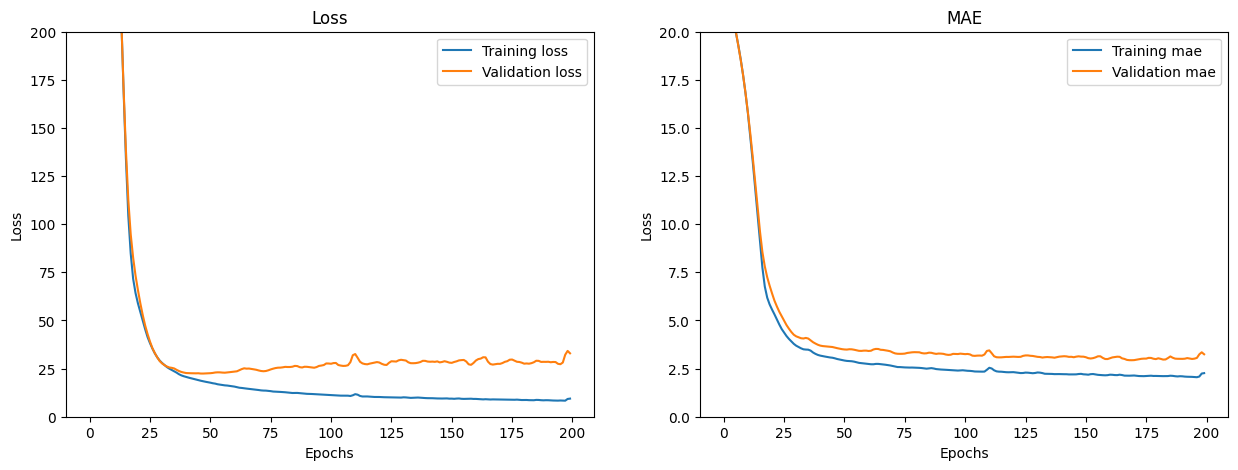

In [ ]:
print(history.history.keys())
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,200)
plt.legend()

plt.subplot(1,2,2)
plt.plot(mae, label='Training mae')
plt.plot(val_mae, label='Validation mae')
plt.title('MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0,20)

# Batch Size
* https://arxiv.org/pdf/1804.07612.pdf
* https://arxiv.org/pdf/1609.04836.pdf

In [ ]:
tf.random.set_seed(0)
np.random.seed(0)

def boston_housing_model(shape):
  model = Sequential()
  model.add(Dense(64, activation='relu', input_shape=(13,)))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer='adam',loss='mse',metrics=['mae', r2])
  return model




In [ ]:
b_sizes = [2,4,8,16,32,64,128,256]
train_evals = np.zeros((len(b_sizes),3))
test_evals = np.zeros((len(b_sizes),3))
for i, bsize in enumerate(b_sizes):
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)
  model = boston_housing_model((X_train.shape[1],))
  history = model.fit(X_train_scaled, y_train ,epochs=200, batch_size=bsize, 
                      validation_data=(X_val, y_val), verbose=0)
  train_evals[i] = model.evaluate(X_train_scaled, y_train)
  test_evals[i] = model.evaluate(X_test, y_test)                              
  print(f"batch_size:{bsize}, Train Eval loss:{train_evals[i, 0]}, \
mae:{train_evals[i, 1]}, r2:{train_evals[i, 2]}")
  print(f"batch_size:{bsize}, Test Eval loss:{test_evals[i, 0]}, \
mae:{test_evals[i, 1]}, r2:{test_evals[i, 2]}")


2/2 [==============================] - 0s 9ms/step - loss: 9.3084 - mae: 2.1711 - r2: 0.8945
batch_size:2, Train Eval loss:1.0401510000228882, mae:0.7750955820083618, r2:0.9853626489639282
batch_size:2, Test Eval loss:9.30841064453125, mae:2.1711392402648926, r2:0.8945484161376953
2/2 [==============================] - 0s 9ms/step - loss: 9.8566 - mae: 2.1150 - r2: 0.8893
batch_size:4, Train Eval loss:1.3414082527160645, mae:0.8370561003684998, r2:0.9804667234420776
batch_size:4, Test Eval loss:9.85655689239502, mae:2.1150293350219727, r2:0.8892648220062256
2/2 [==============================] - 0s 10ms/step - loss: 12.2234 - mae: 2.5786 - r2: 0.8519
batch_size:8, Train Eval loss:1.4366443157196045, mae:0.8585666418075562, r2:0.9802331328392029
batch_size:8, Test Eval loss:12.22336483001709, mae:2.578584909439087, r2:0.8518602848052979
2/2 [==============================] - 0s 10ms/step - loss: 13.5070 - mae: 2.5523 - r2: 0.8539
batch_size:16, Train Eval loss:2.4250142574310303, mae:1.

In [ ]:
eval_df = pd.DataFrame(data=np.hstack((train_evals, test_evals)),
                       columns=['train_loss', 'train_mae', 'train_r2',
                                'test_loss', 'test_mae', 'test_r2'], index=b_sizes)
eval_df

In [ ]:
plt.figure(figsize=(18, 4))
plt.subplot(1,3,1)
eval_df[['train_loss', 'test_loss']].plot.line(marker='o',ax=plt.gca())
plt.xlabel('batch'); plt.ylabel('Loss')

plt.subplot(1,3,2)
eval_df[['train_mae', 'test_mae']].plot.line(marker='o',ax=plt.gca())
plt.xlabel('batch'); plt.ylabel('MAE')

plt.subplot(1,3,3)
eval_df[['train_r2', 'test_r2']].plot.line(marker='o',ax=plt.gca())
plt.xlabel('batch'); plt.ylabel('$R^2$')

# 이진분류


## 손실함수 : Binary Cross Entropy
* $\displaystyle cost(W) = \frac{1}{m}\sum err(y, \hat{y})$
  * $err(y, \hat{y}) = \begin{cases}     y\cdot-log(\hat{y}) & \quad\text{if } y=1\\     (1-y)\cdot-log(1-\hat{y}) & \quad\text {if } y=0   \end{cases}$
* $ \displaystyle cost(W) = \frac{1}{m}\sum_{i=1}^m \Big(y \cdot -log(\hat{y}) + (1-y) \cdot -log(1-\hat{y})\Big) $
* $ \displaystyle cost(W) = -\frac{1}{m}\sum_{i=1}^m \Big(y \cdot log(\hat{y}) + (1-y) \cdot log(1-\hat{y})]$

Text(0.5, 1.0, '$-log(p) + (-log(1-p))$')

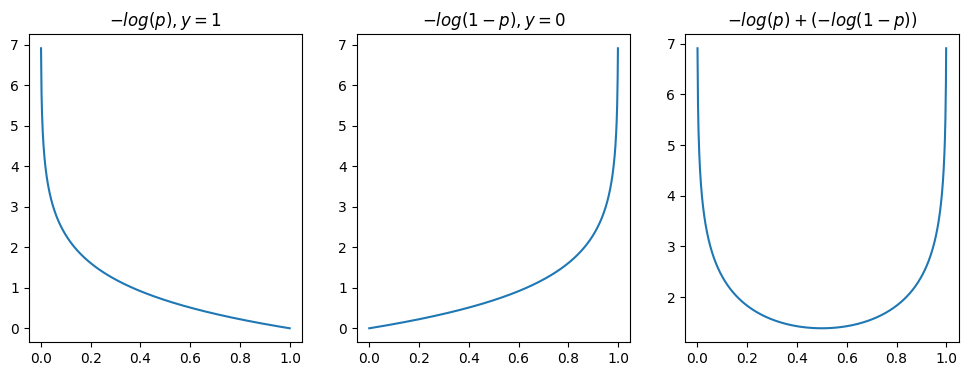

In [ ]:
p = np.arange(0.001, 1, 0.001)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(p, -np.log(p))
plt.title("$-log(p), y=1$")
plt.subplot(1,3,2)
plt.plot(p, -np.log(1-p))
plt.title("$-log(1-p), y=0$")
plt.subplot(1,3,3)
plt.plot(p, -np.log(p) + (-np.log(1-p)))
plt.title('$-log(p) + (-log(1-p))$')

## MSE vs Binary Cross Entropy

In [ ]:
mse_r1 = tf.keras.losses.mse([1], [0.9])
mse_r2 = tf.keras.losses.mse([0], [0.1])
mse_w1 = tf.keras.losses.mse([1], [0.1])
mse_w2 = tf.keras.losses.mse([0], [0.9])
print(f'MSE right:{mse_r1.numpy(), mse_r2.numpy()}',
      f'wrong:{mse_w1.numpy(), mse_w2.numpy()}')

bce_r1 = tf.keras.losses.binary_crossentropy([1], [0.9])
bce_r2 = tf.keras.losses.binary_crossentropy([0], [0.1])
bce_w1 = tf.keras.losses.binary_crossentropy([1], [0.1])
bce_w2 = tf.keras.losses.binary_crossentropy([0], [0.9])
print(f'binary_cross_entropy right:{bce_r1.numpy(), bce_r2.numpy()}',
      f'wrong:{bce_w1.numpy(), bce_w2.numpy()}')

NameError: ignored

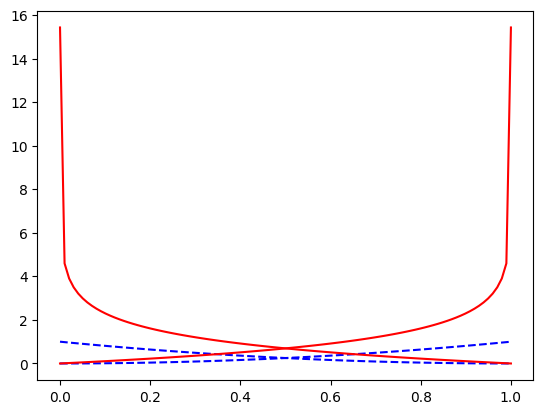

In [ ]:
y_preds = np.linspace(0, 1, 100)
loss_mse_1 = []
loss_mse_0 = []
loss_bce_1 = []
loss_bce_0 = []
for y_pred in y_preds:
  loss_mse_0.append(keras.losses.mse([0], [y_pred]))
  loss_mse_1.append(keras.losses.mse([1], [y_pred]))
  loss_bce_0.append(keras.losses.binary_crossentropy([0], [y_pred]))
  loss_bce_1.append(keras.losses.binary_crossentropy([1], [y_pred]))

plt.plot(y_preds, loss_mse_0, 'b--')
plt.plot(y_preds, loss_mse_1, 'b--')
plt.plot(y_preds, loss_bce_0, 'r-')
plt.plot(y_preds, loss_bce_1, 'r-')


## 이진분류 평가 함수
* `BinaryAccuracy(threshold=0.5)`
  * `update_state(y_true, y_pred)`
  * `reset_state()`
  * `result()`
* 'binary_accuracy' : `keras.metrics.binary_accuracy(y_true, y_pred)`

In [ ]:
y_true = [1,0,0,1]
y_pred1 = [0.9, 0.1, 0.2, 0.8]
y_pred2 = [0.9, 0.1, 0.8, 0.2]

accuracy = keras.metrics.BinaryAccuracy()
accuracy.update_state(y_true, y_pred1)
acc1 = accuracy.result().numpy()
accuracy.reset_state()
accuracy.update_state(y_true, y_pred2)
acc2 = accuracy.result().numpy()
print(acc1, acc2)

acc1 = keras.metrics.binary_accuracy(y_true, y_pred1)
acc2 = keras.metrics.binary_accuracy(y_true, y_pred2)
print(acc1.numpy(), acc2.numpy())

1.0 0.5
1.0 0.5


## IMDB 이진 분류 실습 데이터
* `keras.datasets.imdb.load_data(num_words)`

In [ ]:
from tensorflow.keras.datasets import imdb

(train_data, y_train), (test_data, y_test) = imdb.load_data(num_words=10000)
print(train_data.shape, test_data.shape)


17464789/17464789 [==============================] - 2s 0us/step
(25000,) (25000,)


In [ ]:
print(len(train_data[0]), train_data[0])

218 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
word_index = imdb.get_word_index()
#word_index
index_word = {v:k for k,v in word_index.items()}
#index_word
decoded = [index_word.get(i-3, '@') for i in train_data[0]]
' '.join(decoded)
y_train[1]

1641221/1641221 [==============================] - 1s 1us/step


0

## IMDB 데이터 전처리
* Vectorinzing

In [ ]:
# 10000개의 단어 중에 review sample에서 사용한 단어만 1로 채우기

def vectorize_sequences(seqs, dimension=10000):
  res = np.zeros((len(seqs), dimension))
  for i, seq in enumerate(seqs):
    res[i, seq] = 1.
  return res

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
print(X_train.shape, X_test.shape)
X_train[0], X_test[0]

(25000, 10000) (25000, 10000)


(array([0., 1., 1., ..., 0., 0., 0.]), array([0., 1., 1., ..., 0., 0., 0.]))

## 모델 설계 및 학습

In [ ]:
tf.random.set_seed(0)
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile('adam', 'binary_crossentropy', metrics='binary_accuracy')
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)
model.evaluate(X_train, y_train)
model.evaluate(X_test, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,577
Trainable params: 160,577
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1250/1250 [==============================] - 12s 5ms/step - loss: 0.3379 - binary_accuracy: 0.8526 - val_loss: 0.2875 - val_binary_accuracy: 0.8804
Epoch 2/20
1250/1250 [=

[1.5785245895385742, 0.8572800159454346]

## 학습 history 시각화
* 과적합 확인

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


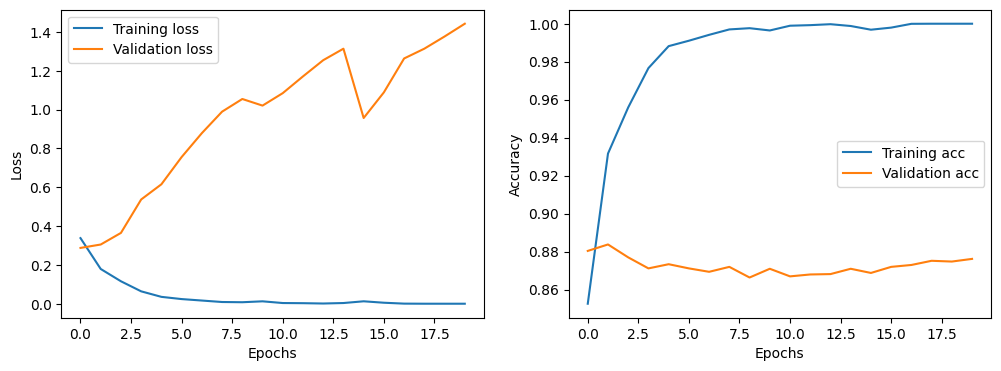

In [ ]:
print(history.history.keys())

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


# Regularization
* Layer regularizer parameter
  * `kernel_regularizer`
  * `bias_regularizer`
  * `activity_regularizer`
* Regularizer 
  * `keras.regularizers.l1(l1=0.01)`
  * `keras.regularizers.l2(l2=0.01)`
  * `keras.regularizers.l1_l2(l1=0.01, l2=0.01)`

In [ ]:
from tensorflow.keras import regularizers

tf.random.set_seed(0)
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.l2(l2=0.01)))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(l2=0.02)))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(l2=0.03)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile('adam', 'binary_crossentropy', metrics='binary_accuracy')
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)
model.evaluate(X_train, y_train)
model.evaluate(X_test, y_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                160016    
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,577
Trainable params: 160,577
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1250/1250 [==============================] - 7s 4ms/step - loss: 0.6541 - binary_accuracy: 0.8385 - val_loss: 0.5418 - val_binary_accuracy: 0.8552
Epoch 2/20
1250/1250 [

[0.42068392038345337, 0.8719199895858765]

In [ ]:
model.evaluate(X_train, y_train)
model.evaluate(X_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.4207 - binary_accuracy: 0.8719


[0.42068392038345337, 0.8719199895858765]

## 시각화

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


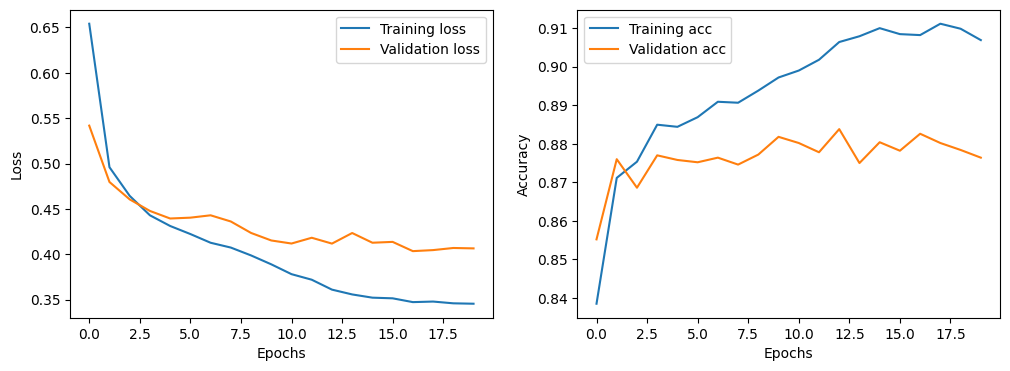

In [ ]:
print(history.history.keys())

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


# Callback을 이용한 과적합 회피 

## ModelCheckPoint
* `ModelCheckpoint(filepath, monitor,...)`
    * 매 epoch 마다 모델의 가중치 저장
    * 훈련 중지된 경우 이어서 훈련 진행
    * Dropbox 와 같은 Cloud drive에 저장 불가

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

m = 50
X = np.arange(m)
y = 2 * X + np.random.randn(m) * 10

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=(1,))
])
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

cb = ModelCheckpoint('weights/ckpt', monitor='loss', save_weights_only=True, save_best_only=True)
history = model.fit(X, y, epochs=200, verbose=0, callbacks=[cb])
model.evaluate(X,y)


2/2 [==============================] - 0s 6ms/step - loss: 733.4575 - mae: 22.2767


[733.45751953125, 22.276714324951172]

In [ ]:
model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=(1,))
])
model2.compile(loss='mse', optimizer='adam', metrics=['mae'])

test_scores = model2.evaluate(X, y, verbose=2)
print('Non Trained Model loss:', test_scores[0])
print('Non Trained Model MAE:', test_scores[1])

print("-"*50)

model2.load_weights('weights/ckpt')
test_scores = model2.evaluate(X, y, verbose=2)
print('Trained Model loss:', test_scores[0])
print('Trained Model MAE:', test_scores[1])

2/2 - 0s - loss: 1506.0105 - mae: 32.8066 - 147ms/epoch - 73ms/step
Non Trained Model loss: 1506.010498046875
Non Trained Model MAE: 32.806602478027344
--------------------------------------------------
2/2 - 0s - loss: 1151.8693 - mae: 28.5861 - 25ms/epoch - 13ms/step
Trained Model loss: 1151.8692626953125
Trained Model MAE: 28.586078643798828


## EarlyStopping Callback

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

tf.random.set_seed(0)
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,), 
                                       kernel_regularizer=regularizers.l2(l2=0.01)))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(l2=0.02)))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(l2=0.03)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam',
             loss='binary_crossentropy',
             metrics=['binary_accuracy'])

cb_stop = EarlyStopping(monitor='val_loss', patience=2)
cb_save = ModelCheckpoint('imdb/ckpt', save_weights_only =True, save_best_only=True )
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2, verbose=0, callbacks=[cb_stop, cb_save])

NameError: ignored

In [ ]:
model.load_weights('imdb.ckpt')
model.evaluate(X_train, y_train)
model.evaluate(X_test, y_test)

# 다항 분류


### One-Hot encoding
* `keras.utils.to_categorical(y, num_classes)`

In [ ]:
y = [0,1,2,0,1,2]
enc = keras.utils.to_categorical(y, 3)
print(enc)
print(tf.argmax(enc, 1))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
tf.Tensor([0 1 2 0 1 2], shape=(6,), dtype=int64)


### Softmax 함수
* 다항 로지스틱 회귀
  * 여러 클래스에 대한 각각의 $H(x)$를 확률로 변형 필요
  * Sigmoid 대신 Softmax 함수 사용
* Softmax
  * $\displaystyle P(z) = \frac{e^{z_i}}{e^{z_0} + e^{z_1} + e^{z_2}... + e^{z_k}}= \frac{e^{z_i}}{\sum_{k=1}^ke^{z_k}} (for \, i=1,2,...,K)$
    * 확율
    * 각 클래스의 출력을 0~1 사이의 값으로 변환, * 모든 클래스의 값의 합은 1
* Tensorflow API
    * `tf.nn.softmax(logits)`
        * types : float16(half), float32, float64
    * `tf.keras.activations.softmax(logits)`

In [ ]:
logits = np.array([[2,1,3]], dtype=np.float32)
print("logits", logits)

p = np.exp(logits) / np.sum(np.exp(logits))
print("probability:", p, "sum:", np.sum(p))

In [ ]:
logits = np.array([[2,1,3]], dtype=np.float32)
print("logits", logits)

p = tf.nn.softmax(logits)
print("probability:", p.numpy(), "sum:", tf.reduce_sum(p).numpy())

p2 = tf.keras.activations.softmax(tf.convert_to_tensor(logits))
print("probability:", p2.numpy(), "sum:", tf.reduce_sum(p2).numpy())

### Cross Entropy Cost
* Softmax의 비용함수 
  * $\displaystyle Cost(W) =  -\frac{1}{m}\sum_{i=1}^m y \cdot log(\hat{y}) = \frac{1}{m}\sum_{i=1}^m -y \cdot log(\hat{y})$
  * Binary Cross Entropy의  $y=1$ 경우를 모두 합한 형태
* Cross Entropy cost 함수 원리
    * 소프트맥스를 통과한 결과값 $\hat{y}$는 어떤 특정한 클래스만 큰 값을 갖고 나머지는 아주 작은 값을 갖는다.
    * One-hot encoding 된 $y$는 정답 클래스인 경우만 1을 나머지는 0을 가지고 있다.
    * $\hat{y}$와 $y$를 곱하면 정답만 남고 나머지는 0으로 사라진다.
    * $-log(p)$함수를 적용하면 0에 가까운 값은 매우 커지고 1에 가까운 값은 0에 가까워 진다.
    * 따라서 $y\cdot -log(\hat{y})$는 정답과 틀리면 매우 큰 값을 갖고 정답에 맞으면 0에 가까운 값이 나오므로 비용함수로 적합하다.

*  Tensorflow API
  * `tf.nn.softmax_cross_entropy_with_logits(labels, logits)`
      *  `labels` :one-hot encoded label
      * `logits` : softmax 하기 전 출력 값(내부적으로 softmax 처리)
  * `tf.keras.losses.categorical_crossentropy(y_true, y_pred)`
      * `y_true` : one-hot encoded label
      * `y_pred` : predted probability
  * `tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)`
      * `y_true` : non one-hot encoded label(class vector)
      * `y_pred` : predted probability    

In [ ]:
y = tf.constant([1], dtype=tf.float32)
y_enc = keras.utils.to_categorical(y, 3)
t_logit = tf.constant([[1, 5, 2]], dtype=tf.float32)
f_logit = tf.constant([[5, 2, 1]], dtype=tf.float32)

t_proba = keras.activations.softmax(t_logit)
f_proba = keras.activations.softmax(f_logit)
print(f'y\t {y}, y_enc\t {y_enc}')
print(f'softmax\t wrong:{f_proba},\t right:{t_proba}')

t_loss = keras.losses.categorical_crossentropy(y_enc, t_proba)
f_loss = keras.losses.categorical_crossentropy(y_enc, f_proba)
print(f'cost\t wrong:{f_loss},\t right:{t_loss}')

t_loss_sparse = keras.losses.sparse_categorical_crossentropy(y, t_proba)
f_loss_sparse = keras.losses.sparse_categorical_crossentropy(y, f_proba)
print(f'cost\t wrong:{f_loss_sparse},\t right:{t_loss_sparse}')

y	 [1.], y_enc	 [[0. 1. 0.]]
softmax	 wrong:[[0.93623954 0.04661262 0.01714783]],	 right:[[0.01714783 0.93623954 0.04661262]]
cost	 wrong:[3.0658839],	 right:[0.06588391]
cost	 wrong:[3.0658839],	 right:[0.06588391]


## MNIST 숫자 손 글씨 데이터
* `keras.datasets.mnist.load_data()`
* 이미지 크기 : 28x28
* 픽셀 데이터 범위 : 0~255


In [ ]:
(train_data, y_train), (test_data, y_test) = keras.datasets.mnist.load_data()
print(train_data.shape, y_train.shape, test_data.shape, y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


uint8


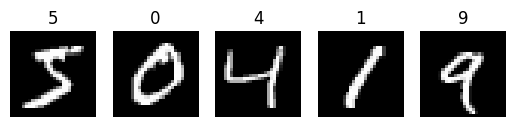

In [ ]:
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(train_data[i], cmap='gray')
  plt.axis('off')
  plt.title(y_train[i])
print(train_data.dtype)

## Data preprocessing
* 정규화(Normalization)
    * 픽셀 데이타 : 0 ~ 255
    * 정규화 데이타 : 0 ~ 1  
* 2차원 이미지를 1차원으로 변경
    * (28,28)
    * (784)

In [ ]:
X_train = train_data/255
X_test = test_data/255
X_train.max(), X_train.min(), X_test.max(), X_test.min()

(1.0, 0.0, 1.0, 0.0)

In [ ]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

## 모델 설계 및 학습
* 입력 : 28*28
* layer1 : 64
* layer2 : 32
* 출력 : 10

In [ ]:
tf.random.set_seed(0)
model=Sequential()
model.add(Dense(64, activation='relu', input_shape=(28*28,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile('adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(X_train,y_train,batch_size=32,epochs=10,validation_split=0.2)

model.evaluate(X_train, y_train)
model.evaluate(X_test, y_test)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 10)                170       
                                                                 
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1500/1500 [==============================] - 12s 4ms/step - loss: 0.3590 - accuracy: 0.8938 - val_loss: 0.1898 - val_accuracy: 0.9452
Epoch 2/10
1500/1500 [===============

[0.09902778267860413, 0.9757999777793884]

*One-hot encoding 하는 경우


In [ ]:
y_train_enc = tf.keras.utils.to_categorical(y_train)
y_test_enc = tf.keras.utils.to_categorical(y_test)

y_train_enc.shape, y_test_enc.shape

((60000, 10), (10000, 10))

In [ ]:
y_train_enc[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
model.compile('adam',loss='categorical_crossentropy', metrics='accuracy')
model.fit(X_train,y_train_enc)
model.evaluate(X_test, y_test_enc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0913 - accuracy: 0.9754


[0.09127268940210342, 0.9753999710083008]

In [ ]:
#학습시킬때 n개 set를 사용하므로 input case가 1개라는 의미

X_test[0].shape, X_test[:1].shape

((784,), (1, 784))

In [ ]:
model.predict(X_test[:1])

1/1 [==============================] - 0s 148ms/step


array([[4.4422861e-11, 4.8723041e-07, 5.9172589e-07, 4.6880918e-06,
        1.3984914e-11, 2.6552244e-13, 1.7646948e-19, 9.9999428e-01,
        6.9014758e-09, 9.3303969e-09]], dtype=float32)

In [ ]:
np.argmax(model.predict(X_test[:1]), axis=1)

1/1 [==============================] - 0s 29ms/step


array([7])

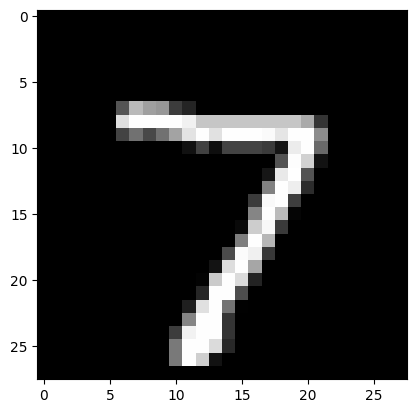

In [ ]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

# BatchNormalization

In [ ]:
tf.random.set_seed(0)


In [ ]:
tf.random.set_seed(0)
model=Sequential()
model.add(Dense(64, input_shape=(28*28,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(16))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile('adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history_bn = model.fit(X_train,y_train,batch_size=32,epochs=10,validation_split=0.2)

model.evaluate(X_train, y_train)
model.evaluate(X_test, y_test)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32)               

[0.07820525765419006, 0.9764000177383423]

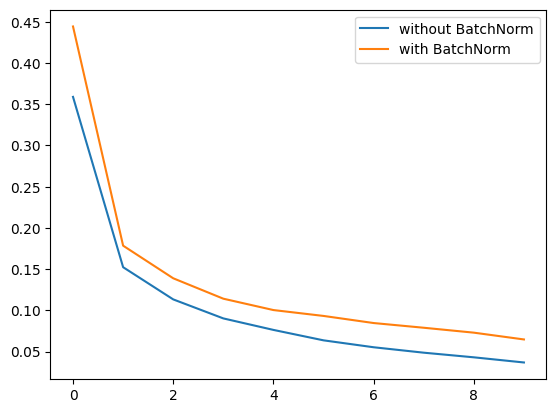

In [ ]:
plt.plot(history.history['loss'], label='without BatchNorm')
plt.plot(history_bn.history['loss'], label='with BatchNorm')
plt.legend()

# Dropout

In [ ]:
from tensorflow.keras.layers import Dropout

tf.random.set_seed(0)

model=Sequential()
model.add(Dense(64, activation='relu', input_shape=(28*28,)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile('adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(X_train,y_train,batch_size=32,epochs=10,validation_split=0.2)

model.evaluate(X_train, y_train)
model.evaluate(X_test, y_test)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_15 (Dense)            (None, 10)               

[0.10555215179920197, 0.9708999991416931]

# 직접 쓴 숫자 인식하기


## 손 글씨 숫자 쓰기
* 온라인 그림판 : https://sketch.io/sketchpad/
* 미리 써놓은 샘플 숫자 이미지 다운로드 :  0458.png

In [ ]:
url_0458 = 'https://share.sketchpad.app/23/25b-b36e-7bf10e.png'

In [ ]:
import os
file_0458 = '0458.png'
if os.name =='posix':
  !wget -O $file_0458 $url_0458
else:
  !pip install wget
  import wget
  wget.download(url_0458, out=file_0458)

--2023-04-20 00:38:23--  https://share.sketchpad.app/23/25b-b36e-7bf10e.png
Resolving share.sketchpad.app (share.sketchpad.app)... 104.26.15.176, 104.26.14.176, 172.67.69.185, ...
Connecting to share.sketchpad.app (share.sketchpad.app)|104.26.15.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94990 (93K) [image/png]
Saving to: ‘0458.png’

0458.png            100%[===================>]  92.76K  --.-KB/s    in 0.04s   

2023-04-20 00:38:23 (2.55 MB/s) - ‘0458.png’ saved [94990/94990]



##  img2data 모듈 download
* 아래의 링크 클릭해서 다운로드 후 업로드

In [ ]:
url_img2data = 'https://www.dropbox.com/s/2b3eamclndq9dkp/img2data.py?dl=1'

In [ ]:
import os
img2data = 'img2data.py'
if os.name =='posix':
  !wget -O $img2data $url_img2data
else:
  !pip install wget
  import wget
  wget.download(url_img2data, out=img2data)

--2023-04-20 00:39:27--  https://www.dropbox.com/s/2b3eamclndq9dkp/img2data.py?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/2b3eamclndq9dkp/img2data.py [following]
--2023-04-20 00:39:28--  https://www.dropbox.com/s/dl/2b3eamclndq9dkp/img2data.py
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3bf7b5daa467d57927e593f0fd.dl.dropboxusercontent.com/cd/0/get/B6gl95HchhqssOIsWIlNqF9MemExC5-9FPwmjjQa1cERGqHl6yVxeuaf_s0A3gXhuBUkdgNgoJSiu1mHKEbLuedahqp4cU9aw9G2gn7FesD_485tIqkriWlqCYixMQSawifM3Uc8b2M-GwcafbUfQ_AFH6Xmytn84UcY-CPKA6yqfQ/file?dl=1# [following]
--2023-04-20 00:39:28--  https://uc3bf7b5daa467d57927e593f0fd.dl.dropboxusercontent.com/cd/0/get/B6gl95HchhqssOIsWIlNqF9MemExC5-9FPwmjjQa1cERGqHl6yVxeuaf_s0A3gXhuBUkdgNgoJSiu1mHK

## 숫자 인식

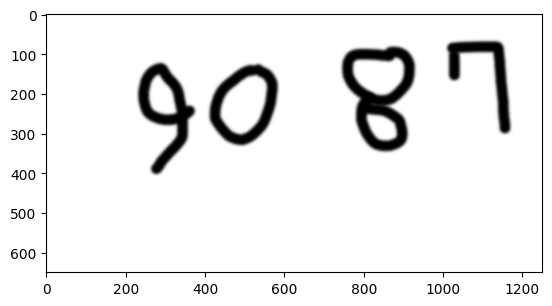

1/1 [==============================] - 0s 101ms/step
[[9.9999678e-01 2.2353583e-16 3.0635169e-06 4.7799820e-11 1.0327153e-10
  7.0552963e-10 7.2749046e-08 2.0542199e-09 1.2966550e-10 9.5779140e-10]] [0]
1/1 [==============================] - 0s 30ms/step
[[1.0203070e-05 1.6864939e-05 2.1045636e-05 6.7713804e-04 3.9860765e-03
  4.4623058e-04 1.2305220e-07 2.0692039e-03 1.6533789e-03 9.9111968e-01]] [9]
1/1 [==============================] - 0s 29ms/step
[[5.9581748e-06 1.7573892e-06 7.1100629e-05 6.2310653e-05 3.5399999e-06
  2.9784415e-04 2.2624467e-05 9.8084286e-08 9.9950528e-01 2.9452593e-05]] [8]
1/1 [==============================] - 0s 48ms/step
[[2.4061287e-03 1.8864565e-02 9.0092756e-02 3.8419214e-01 4.7496296e-04
  8.7916860e-03 2.5833189e-04 9.1811996e-03 4.7349972e-01 1.2238517e-02]] [8]


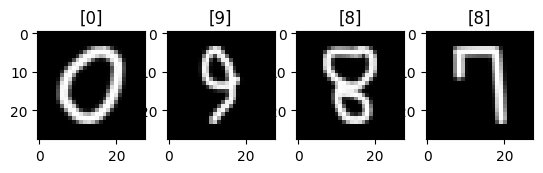

In [ ]:
import img2data
import cv2

img_path = '0458.png'

image = cv2.imread(img_path)
plt.imshow(image)
plt.show()

numbers = img2data.img2digits(image, (28,28), border=4)
for i, n in enumerate(numbers):
    pred = model.predict(n.astype(np.float32)/255.0)
    pred_label = np.argmax(pred, axis=1)
    print(pred, pred_label)
    plt.subplot(1, len(numbers), i+1)
    plt.title(str(pred_label))
    plt.imshow(n.reshape(28,28), cmap="gray")

# 다중 출력 모델

## 데이터 준비
* MNIST 데이터, 숫자와 홀짝수 분류 모델
* 새로운 레이블 : 0=홀수, 1=짝수

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
(X_train, X_test) = (np.float32(X_train)/255, np.float32(X_test)/255)
n_input = 28*28
(X_train, X_test) = (X_train.reshape(-1, n_input), X_test.reshape(-1, n_input))

y_train_odd = y_train%2
y_test_odd = y_test %2
print(y_train[:10], y_train_odd[:10])
print(y_test[:10], y_test_odd[:10])

## 모델 생성

## 모델 학습

## 모델 평가

## 추론